In [110]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [111]:
#Reading the dataset
kidney = pd.read_csv("kidney_disease.csv")
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [112]:
# To see what are the column names in our dataset
print(kidney.columns)

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [113]:
# Mapping the text to 1/0 and cleaning the dataset 
kidney[['htn','dm','cad','pe','ane']] = kidney[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
kidney[['rbc','pc']] = kidney[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
kidney[['pcc','ba']] = kidney[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
kidney[['appet']] = kidney[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
kidney['classification'] = kidney['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
kidney.rename(columns={'classification':'class'},inplace=True)

kidney['pe'] = kidney['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
kidney['appet'] = kidney['appet'].replace(to_replace='no',value=0)
kidney['cad'] = kidney['cad'].replace(to_replace='\tno',value=0)
kidney['dm'] = kidney['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
kidney.drop('id',axis=1,inplace=True)

In [114]:
kidney.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [115]:
# This helps us to count how many NaN are there in each column
len(kidney)-kidney.count()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wc       105
rc       130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [116]:
# This shows number of rows with missing data
kidney.isnull().sum(axis = 1)

0      3
1      5
2      3
3      0
4      2
      ..
395    0
396    0
397    0
398    0
399    0
Length: 400, dtype: int64

<Axes: >

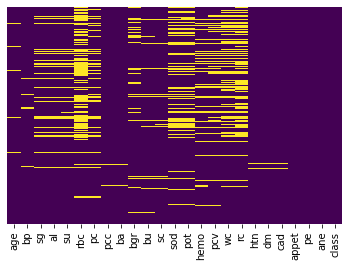

In [117]:
#This is a visualization of missing data in the dataset
sns.heatmap(kidney.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [118]:
# This shows number of complete cases and also removes all the rows with NaN
kidney2 = kidney.dropna()
print(kidney2.shape)

(158, 25)


<Axes: >

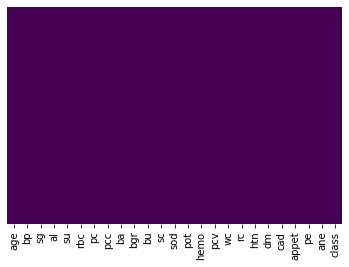

In [119]:
# Now our dataset is clean
sns.heatmap(kidney2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<ipython-input-120-963865e4cbb6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(kidney2.corr())


<Axes: >

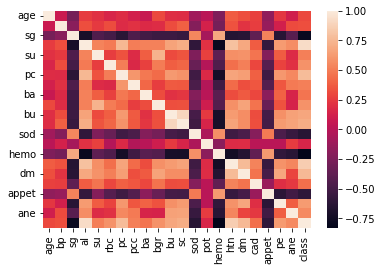

In [120]:
sns.heatmap(kidney2.corr())

Axes(0.125,0.125;0.775x0.755)


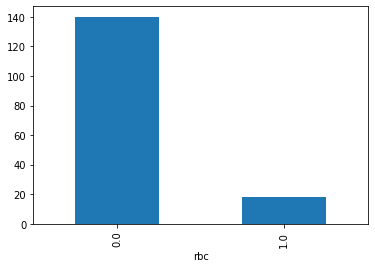

In [121]:
# Counting number of normal vs. abnormal red blood cells of people having chronic kidney disease
print(kidney2.groupby('rbc').rbc.count().plot(kind="bar"))

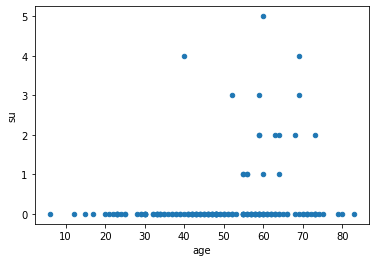

In [122]:
#This plot shows the patient's sugar level compared to their ages
kidney2.plot(kind='scatter', x='age',y='su');
plt.show()

In [123]:
# Shows the maximum blood pressure having chronic kidney disease
print(kidney2.groupby('class').bp.max())

class
0.0     80.0
1.0    110.0
Name: bp, dtype: float64


In [124]:
print(kidney2['dm'].value_counts(dropna=False))

0.0    130
1.0     28
Name: dm, dtype: int64


In [125]:
X_train, X_test, y_train, y_test = train_test_split(kidney2.iloc[:,:-1], kidney2['class'], test_size=0.2, random_state=42, stratify= kidney2['class'])

In [126]:
print(X_train.shape)

(126, 24)


In [127]:
y_train.value_counts()

0.0    92
1.0    34
Name: class, dtype: int64

In [128]:
rfc = RandomForestClassifier(random_state = 22)
rfc_fit = rfc.fit(X_train,y_train)

In [129]:
rfc_pred = rfc_fit.predict(X_test)

In [130]:
print(confusion_matrix(y_test,rfc_pred))

[[23  0]
 [ 0  9]]


In [131]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [132]:
accuracy_score( y_test, rfc_pred)

1.0

# Saving the best model RFC

In [133]:
import pickle

#Save model
filename = 'rfc.pkl'
pickle.dump(rfc_fit, open(filename, 'wb'))

In [134]:
knn = KNeighborsClassifier(n_neighbors=1)

In [135]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [136]:
pred = knn.predict(X_test)

In [137]:
print(confusion_matrix(y_test,pred))

[[23  0]
 [ 3  6]]


In [138]:
knn.score(X_train, y_train)

1.0

# Saving KNN model

In [139]:
#Save model
filename = 'knn.pkl'
pickle.dump(knn, open(filename, 'wb'))

In [140]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        23
         1.0       1.00      0.67      0.80         9

    accuracy                           0.91        32
   macro avg       0.94      0.83      0.87        32
weighted avg       0.92      0.91      0.90        32



In [141]:
accuracy_score( y_test,pred)

0.90625

In [142]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/user/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [143]:
logmodel.score(X_train, y_train)

1.0

# Saving Log Model

In [144]:
#Save model
filename = 'logmodel.pkl'
pickle.dump(logmodel, open(filename, 'wb'))

In [145]:
predictions = logmodel.predict(X_test)

In [146]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [147]:
print(confusion_matrix(y_test,predictions))

[[23  0]
 [ 0  9]]


In [148]:
accuracy_score( y_test, predictions)

1.0

In [149]:
feature_importances = pd.DataFrame(rfc.fit(X_train,y_train).feature_importances_, index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

       importance
al       0.191918
pcv      0.142417
hemo     0.126328
sc       0.116986
sg       0.083417
rc       0.080043
bu       0.074990
pc       0.045342
htn      0.036520
bgr      0.024205
dm       0.021721
sod      0.020059
bp       0.008601
rbc      0.008064
wc       0.005361
pcc      0.003808
su       0.003093
age      0.002289
ane      0.001701
cad      0.001170
appet    0.001098
ba       0.000870
pot      0.000000
pe       0.000000


In [150]:
kidney3 = kidney.drop(columns=['rbc', 'pc', 'sod', 'pot', 'pcv', 'wc', 'rc'])
kidney3. shape

(400, 18)

In [151]:
kidney3[-10:]

,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,class
390,52.0,80.0,1.025,0.0,0.0,0.0,0.0,99.0,25.0,0.8,15.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
391,36.0,80.0,1.025,0.0,0.0,0.0,0.0,85.0,16.0,1.1,15.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0
392,57.0,80.0,1.020,0.0,0.0,0.0,0.0,133.0,48.0,1.2,14.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0
393,43.0,60.0,1.025,0.0,0.0,0.0,0.0,117.0,45.0,0.7,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
394,50.0,80.0,1.020,0.0,0.0,0.0,0.0,137.0,46.0,0.8,14.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,140.0,49.0,0.5,15.7,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,75.0,31.0,1.2,16.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,100.0,26.0,0.6,15.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,114.0,50.0,1.0,14.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
399,58.0,80.0,1.025,0.0,0.0,0.0,0.0,131.0,18.0,1.1,15.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [152]:
kidney3.isnull().sum()

age       9
bp       12
sg       47
al       46
su       49
pcc       4
ba        4
bgr      44
bu       19
sc       17
hemo     52
htn       2
dm        2
cad       2
appet     1
pe        1
ane       1
class     0
dtype: int64

In [153]:
kidney3.mode()

,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,class
0,60.0,80.0,1.02,0.0,0.0,0.0,0.0,99.0,46.0,1.2,15.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [154]:
# Fill in the NaNs with the mode for each column.   
kidney3_imp = kidney3.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [155]:
kidney3_imp.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
hemo     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [156]:
X_train, X_test, y_train, y_test = train_test_split(kidney3_imp.iloc[:,:-1], kidney3_imp['class'],
                                                    test_size = 0.2, random_state=44,
                                                   stratify = kidney3_imp['class'])

In [157]:
y_train.value_counts()

1.0    200
0.0    120
Name: class, dtype: int64

In [158]:
rfc = RandomForestClassifier(random_state = 22)
rfc_fit = rfc.fit(X_train,y_train)

In [159]:
rfc_pred = rfc_fit.predict(X_test)

In [160]:
rfc_fit.score(X_train, y_train)

1.0

# Saving New RFC Model

In [161]:
#Save model
filename = 'rfc_fit_new.pkl'
pickle.dump(rfc_fit, open(filename, 'wb'))

In [162]:
print(confusion_matrix(y_test,rfc_pred))

[[30  0]
 [ 0 50]]


In [163]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [164]:
accuracy_score( y_test, rfc_pred)

1.0

In [165]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/user/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [166]:
logmodel.score(X_train, y_train)

0.978125

# Saving new Log Model

In [167]:
#Save model
filename = 'logmodel_new.pkl'
pickle.dump(logmodel, open(filename, 'wb'))

In [168]:
predictions = logmodel.predict(X_test)

In [169]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        30
         1.0       0.98      1.00      0.99        50

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [170]:
print(confusion_matrix(y_test,predictions))

[[29  1]
 [ 0 50]]


In [171]:
accuracy_score( y_test, rfc_pred)

1.0

In [172]:
dtree=DecisionTreeClassifier()

In [173]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [174]:
dtree.score(X_train, y_train)

1.0

# Saving New decision tree model

In [175]:
#Save model
filename = 'dtree.pkl'
pickle.dump(dtree, open(filename, 'wb'))

In [176]:
predictions=dtree.predict(X_test)

In [177]:
print(confusion_matrix(y_test,predictions))

[[30  0]
 [ 0 50]]


In [178]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [179]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)/Graphviz2.38/bin/'

features = list(kidney3.columns[1:])
features

ModuleNotFoundError: No module named 'pydot'

In [180]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [181]:
rfc.score(X_train, y_train)

1.0

In [182]:
rfc_pred = rfc.predict(X_test)

In [183]:
#Save model
filename = 'rfc_high.pkl'
pickle.dump(rfc, open(filename, 'wb'))

In [184]:
print(confusion_matrix(y_test,rfc_pred))

[[30  0]
 [ 0 50]]


In [185]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [186]:
accuracy_score( y_test, rfc_pred)

1.0

In [187]:
# Choosing a K Value.
# Let's go ahead and use the elbow method to pick a good k value.
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

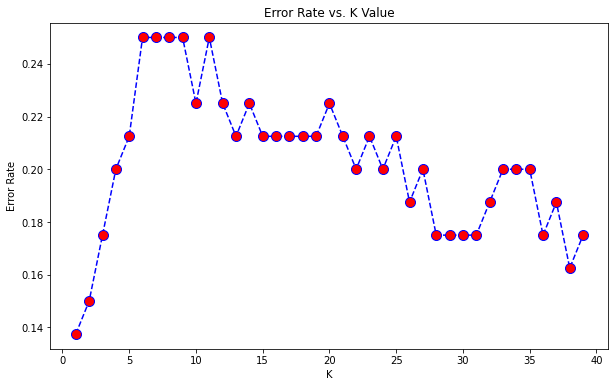

In [188]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [189]:
knn = KNeighborsClassifier(n_neighbors=1)

In [190]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [191]:
pred = knn.predict(X_test)

In [192]:
knn.score(X_train, y_train)

1.0

# Saving Lowest KNN model

In [193]:
#Save model
filename = 'knn_lowest.pkl'
pickle.dump(knn, open(filename, 'wb'))

In [194]:
print(confusion_matrix(y_test,pred))

[[26  4]
 [ 7 43]]


In [195]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83        30
         1.0       0.91      0.86      0.89        50

    accuracy                           0.86        80
   macro avg       0.85      0.86      0.86        80
weighted avg       0.87      0.86      0.86        80



In [196]:
accuracy_score( y_test,pred)

0.8625

In [197]:
X_test.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'hemo',
       'htn', 'dm', 'cad', 'appet', 'pe', 'ane'],
      dtype='object')

In [199]:
import pickle

In [200]:
loaded_model = pickle.load(open('logmodel_new.pkl', 'rb'))

In [204]:
for column in X_train.columns: print(column)

age
bp
sg
al
su
pcc
ba
bgr
bu
sc
hemo
htn
dm
cad
appet
pe
ane
